# Titanic: Machine Learning from Disaster

[Titanic Kaggle Competition](https://www.kaggle.com/c/titanic)  
[Titanic Data](https://www.kaggle.com/c/titanic/data)

The Titanic competition on Kaggle is an ongoing beginner contest.  This is a great first problem to try on Kaggle.  The data set is relatively small, however unlike the [Machine Learning Hello World](http://machinelearningspecialist.com/hello-world-machine-learning/) using the Iris data set, the Titanic data set does have missing values and offers more room for some feature engineering.

### 1. Understand the Problem

Given characteristis of the passengers onboard the Titanic, can we predict which passengers were most likely to surive?

Our training set is labeled and the column we are trying to predict is simply a binary - did they survive yes/no.  Kaggle works by giving you a labeled training set, and then an unlabeled test set.  The unlabeled test set is what you make predictions on and then submit.  

The public leaderboard only shows the score for a random 50% of the test set and will score the remaining 50% when the contest concludes.  Since this is an ongoing beginner contest, the second 50% of the test set will never be used.

This is a **supervised classification** problem.

### 2. Data Collection & Cleaning

Download the data set from [Kaggle - Titanic Data](https://www.kaggle.com/c/titanic/data).  

Now we can load the data and begin to understand what we have and what transformations need to be done.

In [1]:
import pandas as pd
import numpy as np

#Inspect Train Data
train_df = pd.read_csv("train.csv")
train_df.shape

(891, 12)

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Inspect Test Data
test_df = pd.read_csv("test.csv")
test_df.shape

(418, 11)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Missing Values

We can see that there are quite a few missing values in this data set.  The 'Cabin' column is missing 687 values out of 891 data points in the training set.  There maybe some information gain in this column but with so many values missing it would be hard to generalize the missing values, so I am choosing to drop the 'Cabin' column.

For 'Age' we can choose to fill in the NaNs.  A simple solution would be to just use the median age.

The 'Embarked' column only has two values missing so we can simply fill these in by the mode.  

The 'Fare' column only 1 missing value so will just use the median.

An important thing to note is that any transformation we apply to the training set must also be applied to the test set.  Therefore it would be best to store all transformations in a function that can be called on both data sets.

In [11]:
def clean_missing_values(df):
    '''(DataFrame) -> DataFrame
    
    Will handle missing values in the Titanic set.
    '''
    #Drop Cabin
    df.drop("Cabin", axis=1, inplace=True)
    #Fill Age with median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    #Fill Fare with median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    #Fill Embarked with mode
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    return df

In [12]:
#Clean_missing_values
train_df = clean_missing_values(train_df)
test_df = clean_missing_values(test_df)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3. Explore & Understand the Data

Now that the data is cleaned and missing values have been dealt with, let's visualize and explore the data we have.  Our goal is to better understand our data set and begin to come up with ideas for features we can engineer to better model this problem.

We also need to explore some of these categorical/ non-numerical features a bit more to see the best way to encode them for our machine learning algorithm.  'Sex' and 'Embarked', only being 2 or 3 types can simply be one hot encoded.  'Ticket' and 'Name' we will need to see what can be used from that.

The first thing we should realize is that 'PassengerID' is simply an ordered list of numbers to act as a unique identifier for our samples, therefore this should not be used in the predictive model.  

#### Quantitative EDA

In [14]:
#Correlation
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [15]:
#Total Survived
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Visual EDA

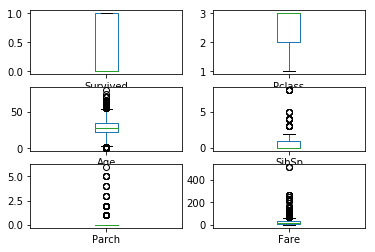

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#Box Plot
train_df.drop('PassengerId', axis=1).plot(kind='box', layout=(3, 2), sharex=False, subplots=True);

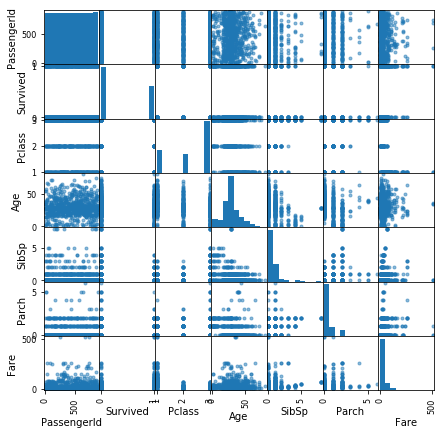

In [17]:
#Scatter Matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(train_df, figsize=(7,7));

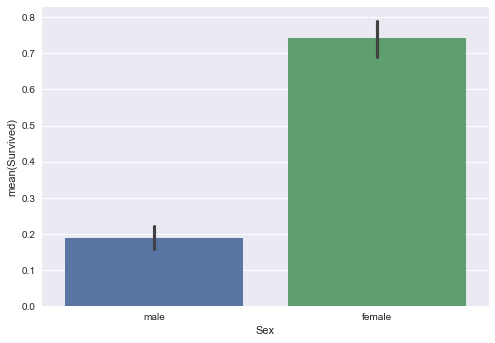

In [18]:
#Bar Plot
import seaborn as sns

sns.barplot(x='Sex', y='Survived', data=train_df);

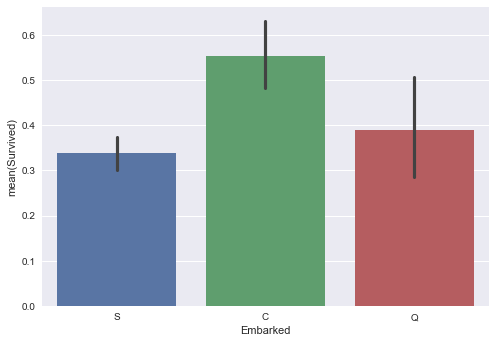

In [19]:
#Bar Plot
sns.barplot(x='Embarked', y='Survived', data=train_df);

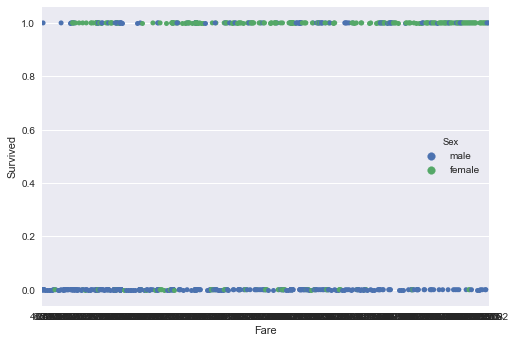

In [20]:
#Swarm Plot
sns.swarmplot(x='Fare', y='Survived', hue='Sex', data=train_df);

This plot probably the most revealing so far.  The top line are those passengers that survived, we see a lot more females and we see a clustering in the far right which is the higher fare price.  Where as in the bottom left we have those passengers that did not survive and it seems to be a very dense cluster of men whom had paid lower fares.

### 4. Prepare Data for Machine Learning Algorithims

#### Feature Encoding

Before we begin constructing new features, let us encode the categorical variables.  Remeber that all transformations done to the training feature must also be done to the test features.

In [21]:
#Which columns need to be converted still?
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

The Name, Sex, Ticket, and Embarked columns are non-numerical types.  Sex and Embarked we saw earlier are simple binary types, those will be easy to encode using dummy varaibles.  Name and ticket will need some more work to try and extract what useful information we can.

In [22]:
#Encode Sex Column
sex_train = pd.get_dummies(train_df['Sex'], prefix='is')
sex_test = pd.get_dummies(test_df['Sex'], prefix='is')

In [23]:
sex_train

,is_female,is_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [24]:
#Drop 'Sex' column and add our dummy df
train_df.drop('Sex', axis=1, inplace=True)
train_df = train_df.join(sex_train)
test_df.drop('Sex', axis=1, inplace=True)
test_df = test_df.join(sex_test)
#Preview
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,is_female,is_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [25]:
#Encode Embarked
embarked_train = pd.get_dummies(train_df['Embarked'], prefix='embarked')
embarked_test = pd.get_dummies(test_df['Embarked'], prefix='embarked')

In [26]:
embarked_train

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [27]:
#Drop 'Embarked' column and add our dummy df
train_df.drop('Embarked', axis=1, inplace=True)
train_df = train_df.join(embarked_train)
test_df.drop('Embarked', axis=1, inplace=True)
test_df = test_df.join(embarked_test)
#Preview
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,is_female,is_male,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


#### Feature Engineering & Feature Extraction

Now we still have 'Ticket' and 'Name' as our remaining non-numerical data types.  Let's do a bit more data exploration and see what features we can engineer.  Since these fields aren't categories it does not make sense to encode them like we did for 'Embarked' and 'Sex'.

'Ticket' # should be a unique value for each ticket, however there can be some info in the ticket number as to where or what cabin that ticket belonged to.  Using the first character of each ticket might be able to add some information to our model.

For 'Name', it is a similar idea where the title and/or length of the name might indicate some importance and therefore correlate with the survival.  A person's title we will define as whatever string comes before a period.

**Ticket First Character**

In [28]:
#Ticket first character
train_copy = train_df.copy() #Make a copy to explore some of these feature ideas
train_copy['TicketFirstChar'] = train_copy['Ticket'].apply(lambda x: str(x)[0])
train_copy['Survived'].groupby(train_copy['TicketFirstChar']).value_counts(normalize=True)

TicketFirstChar  Survived
1                1           0.630137
                 0           0.369863
2                0           0.535519
                 1           0.464481
3                0           0.760797
                 1           0.239203
4                0           0.800000
                 1           0.200000
5                0           1.000000
6                0           0.833333
                 1           0.166667
7                0           0.888889
                 1           0.111111
8                0           1.000000
9                1           1.000000
A                0           0.931034
                 1           0.068966
C                0           0.659574
                 1           0.340426
F                1           0.571429
                 0           0.428571
L                0           0.750000
                 1           0.250000
P                1           0.646154
                 0           0.353846
S                0      

** Title from Name **

In [29]:
#Get Title
def get_title(name):
    '''(string) -> string
    
    Given a name from dataframe, return the Title
    '''
    comma_list = name.split(",")
    front_part_of_name = comma_list[1].split()
    return front_part_of_name[0]

#Test Function
get_title('Beckwith, Mrs. Richard Leonard (Sallie Monypeny)')

'Mrs.'

In [30]:
#Title Survival Rate
train_copy['Title'] = train_copy['Name'].apply(get_title)
train_copy['Survived'].groupby(train_copy['Title']).value_counts(normalize=True)

Title      Survived
Capt.      0           1.000000
Col.       0           0.500000
           1           0.500000
Don.       0           1.000000
Dr.        0           0.571429
           1           0.428571
Jonkheer.  0           1.000000
Lady.      1           1.000000
Major.     0           0.500000
           1           0.500000
Master.    1           0.575000
           0           0.425000
Miss.      1           0.697802
           0           0.302198
Mlle.      1           1.000000
Mme.       1           1.000000
Mr.        0           0.843327
           1           0.156673
Mrs.       1           0.792000
           0           0.208000
Ms.        1           1.000000
Rev.       0           1.000000
Sir.       1           1.000000
the        1           1.000000
Name: Survived, dtype: float64

** Length of Name **

In [31]:
#Length of Name
train_copy['NameLength'] = train_copy['Name'].apply(len)
train_copy['Survived'].groupby(pd.qcut(train_copy['NameLength'], 5)).value_counts(normalize=True)

NameLength  Survived
[12, 19]    0           0.779412
            1           0.220588
(19, 23]    0           0.698718
            1           0.301282
(23, 27]    0           0.680203
            1           0.319797
(27, 32]    0           0.557576
            1           0.442424
(32, 82]    1           0.674556
            0           0.325444
Name: Survived, dtype: float64

** Size of Family **

In [32]:
#Size of Family
train_copy['FamilySize'] = train_copy['Parch'] + train_copy['SibSp']
train_copy['Survived'].groupby(train_copy['FamilySize']).value_counts(normalize=True)

FamilySize  Survived
0           0           0.696462
            1           0.303538
1           1           0.552795
            0           0.447205
2           1           0.578431
            0           0.421569
3           1           0.724138
            0           0.275862
4           0           0.800000
            1           0.200000
5           0           0.863636
            1           0.136364
6           0           0.666667
            1           0.333333
7           0           1.000000
10          0           1.000000
Name: Survived, dtype: float64

#### Feature Engineering (cont'd)

So now we have examined 4 features to add to our model.  Since these need to be applied to both training and testing data we will implement them with a function.  The work done above was to test and investigate our feature ideas.  Looking at the differences in survival rate grouped by our new features shows there can be information gained by adding these.  We can double check this is true later on by checking the feature importances of our model.

In [33]:
#Add Features to each DataFrame
def add_features(df):
    #Family Size
    df['FamilySize'] = df['Parch'] + df['SibSp']
    #Title
    df['Title'] = df['Name'].apply(get_title)
    #Length of Name
    df['NameLength'] = df['Name'].apply(len)
    #First Letter of Ticket
    df['TicketFirstChar'] = df['Ticket'].apply(lambda x: str(x)[0])
    return df

train_df = add_features(train_df)
test_df = add_features(test_df)

train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,is_female,is_male,embarked_C,embarked_Q,embarked_S,FamilySize,Title,NameLength,TicketFirstChar
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,1,Mr.,23,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,Mrs.,51,P
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,Miss.,22,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,Mrs.,44,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,Mr.,24,3


In [34]:
train_df.shape

(891, 18)

In [35]:
test_df.shape

(418, 17)

In [36]:
train_df.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
is_female            uint8
is_male              uint8
embarked_C           uint8
embarked_Q           uint8
embarked_S           uint8
FamilySize           int64
Title               object
NameLength           int64
TicketFirstChar     object
dtype: object

#### Encode New Features

Now we need to convert the new non-numerical categorical features into numerical information.  Since the population of titles and first ticket characters may differ between the train and test set, we need to temporarily merge the two data frames in order to encode these features.  Otherwise we would have a column number mismatch if we one hot encode them seperately.

** Merge Train & Test DF **

In [37]:
#Last Passenger in Train DF (for verification later)
train_df.iloc[-1]['Name']

'Dooley, Mr. Patrick'

In [38]:
#First Passenger in Test DF
test_df.iloc[0]['Name']

'Kelly, Mr. James'

In [39]:
#Merge our train & test set TEMPORARILY, in order to encode the features
merged_df = train_df.append(test_df)
merged_df = merged_df.set_index(merged_df['PassengerId'])
merged_df.shape

(1309, 18)

In [40]:
#Get dummies for Title
title_dummies = pd.get_dummies(merged_df['Title'], prefix='title')
merged_df = merged_df.join(title_dummies)
merged_df.drop('Title', axis=1, inplace=True)
merged_df.shape

(1309, 35)

In [41]:
#Get dummies for TicketFirstChar
ticket_dummies = pd.get_dummies(merged_df['TicketFirstChar'], prefix='tick_first')
merged_df = merged_df.join(ticket_dummies)
merged_df.drop('TicketFirstChar', axis=1, inplace=True)
merged_df.shape

(1309, 50)

** Un-Merge and Verify **

Now let's split the merged dataframe verify that the train and test data have split back successfully and all our feature columns are as expected.

In [43]:
train_df = merged_df[:891].copy()
train_df.iloc[-1]['Name']

'Dooley, Mr. Patrick'

In [45]:
test_df = merged_df.iloc[891:].copy()
test_df.iloc[0]['Name']

'Kelly, Mr. James'

In [46]:
#Drop survived from test set - all these values were NaN - no info was leaked
test_df.drop('Survived', axis=1, inplace=True)

In [47]:
#Drop Name - extracted this info into NameLength and Title
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
#Drop Ticket - extracted this info into TicketFirstChar
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [48]:
train_df.shape

(891, 48)

In [49]:
test_df.shape

(418, 47)

In [50]:
train_df.dtypes

Age                float64
FamilySize           int64
Fare               float64
NameLength           int64
Parch                int64
PassengerId          int64
Pclass               int64
SibSp                int64
Survived           float64
embarked_C           uint8
embarked_Q           uint8
embarked_S           uint8
is_female            uint8
is_male              uint8
title_Capt.          uint8
title_Col.           uint8
title_Don.           uint8
title_Dona.          uint8
title_Dr.            uint8
title_Jonkheer.      uint8
title_Lady.          uint8
title_Major.         uint8
title_Master.        uint8
title_Miss.          uint8
title_Mlle.          uint8
title_Mme.           uint8
title_Mr.            uint8
title_Mrs.           uint8
title_Ms.            uint8
title_Rev.           uint8
title_Sir.           uint8
title_the            uint8
tick_first_1         uint8
tick_first_2         uint8
tick_first_3         uint8
tick_first_4         uint8
tick_first_5         uint8
t

### 5. Modeling

Phew, that was a lot of work!  But now we finally have a cleaned data set with some extra features that are properly encoded to get the best results possible from a machine learning algorithm.  

We can now sample some different models using cross-validation with our training set.

In [51]:
#Get feature columns as list (exclude 'PassengerId' as feature)
#Get list from test b/c 'Survived' not in list
feature_columns = list(test_df)
feature_columns.remove('PassengerId')

In [52]:
#Get our data as numpy arrays for sklearn
X_train = train_df[feature_columns].values
y_train = train_df['Survived'].values
X_test = test_df[feature_columns].values

#### Random Forest

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Initialize Model
rf = RandomForestClassifier()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
print cv_results.mean()

0.820344455794


#### XGB

In [54]:
from xgboost import XGBClassifier

#Initialize Model
xgb = XGBClassifier()
#Train & Test model
cv_results = cross_val_score(xgb, X_train, y_train, cv=10, scoring='accuracy')
print cv_results.mean()

0.829408693678


### 6. Evaluate & Tune Model
You could sample a few different algorithims if you'd like but I will move forward with the RandomForest and tune that for my final model.  I will optimize using GridSearch.

#### Optimizing with GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

#Parameter dictionary for gridsearch
params = {'max_depth': [5, 8, 15, 25],
          'min_samples_split': [2, 5, 10, 15],
          'max_features': ['log2', 'auto', None]}
#Initialize Model
rf = RandomForestClassifier(n_estimators=100)
#Initialize GridSearch
grid_cv = GridSearchCV(rf, params, cv=5)
#Fit GridSearch
grid_cv.fit(X_train, y_train)
#Get Best Results
print "Best Score: {}, Best Parameters: {}".format(grid_cv.best_score_, grid_cv.best_params_)

Best Score: 0.837261503928, Best Parameters: {'max_features': 'auto', 'min_samples_split': 5, 'max_depth': 15}


In [56]:
#Expand the GridSearch

#Parameter dictionary for gridsearch
params = {'max_depth': [20, 25, 50, 100],
          'min_samples_split': [4, 5, 6, 8],
          'max_features': ['log2', 'auto', None]}
#Initialize Model
rf = RandomForestClassifier(n_estimators=100)
#Initialize GridSearch
grid_cv = GridSearchCV(rf, params, cv=5)
#Fit GridSearch
grid_cv.fit(X_train, y_train)
#Get Best Results
print "Best Score: {}, Best Parameters: {}".format(grid_cv.best_score_, grid_cv.best_params_)

Best Score: 0.841750841751, Best Parameters: {'max_features': 'log2', 'min_samples_split': 4, 'max_depth': 25}


#### Build Final Model


In [57]:
#Initialize Optimal Model
rf = RandomForestClassifier(n_estimators=5000, max_features='auto', min_samples_split=5, max_depth=25)
#Train Model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [58]:
#Make Predictions on Test Set
pred = rf.predict(X_test)

In [59]:
#Create Submission file for Kaggle
pred_df = test_df.copy()
pred_df['Survived'] = pred.astype(int)
output_df = pred_df[['PassengerId', 'Survived']]
output_df.to_csv("predictions.csv", index=False)

### 7. Present Results

After a little tuning of our Random Forest we were able to get a cross validation **accuracy score of 84.17%**.  Using those parameters for our final model and increasing the number of trees in our model we get a ** public leader board score of .77033**.  Since there is randomness inherit in a Random Forest your actual results may differ slightly.

#### Next Steps

Thank you for checking out this notebook, I hope you have a better understanding of the start-to-finish process of a Kaggle competition.  

If you wish to improve on this score try playing with a few different types of models or further tuning the model.  Another thing to try is to check out the feature_importances of our model and maybe select only the top 10 most predictive features to try and make a more robust model that will generalize better to the unseen data in the test set.

If you're ready for a new data set then try out another [Kaggle Competition](https://www.kaggle.com/competitions)!